# GeoPandas
In this notebook, we will look at GeoPandas and how we can use it to visualize our OSM and GADM data.

In [1]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

We first establish a connection to our database

In [68]:
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)

## Handling PostGIS Queries and GeoPandas Dataframe

Previously, we used pandas to read our sql queries through pd.read_sql. For GeoPandas, we use gpd.read_postgis

In [3]:
gpd.read_postgis?

Signature:
gpd.read_postgis(
    sql,
    con,
    geom_col='geom',
    crs=None,
    index_col=None,
    coerce_float=True,
    parse_dates=None,
    params=None,
    chunksize=None,
)
Docstring:
Returns a GeoDataFrame corresponding to the result of the query
string, which must contain a geometry column in WKB representation.

It is also possible to use :meth:`~GeoDataFrame.read_file` to read from a database.
Especially for file geodatabases like GeoPackage or SpatiaLite this can be easier.

Parameters
----------
sql : string
    SQL query to execute in selecting entries from database, or name
    of the table to read from the database.
con : sqlalchemy.engine.Connection or sqlalchemy.engine.Engine
    Active connection to the database to query.
geom_col : string, default 'geom'
    column name to convert to shapely geometries
crs : dict or str, optional
    CRS to use for the returned GeoDataFrame; if not set, tries to
    determine CRS from the SRID associated with the first geometr

In [42]:
#Lets query our gadm map first and store it as our ph_shp
ph_shp = gpd.read_postgis(
'''
SELECT *
FROM gadm.ph
''', con=conn, geom_col = 'geom')
ph_shp

/opt/conda/lib/python3.10/site-packages/geopandas/io/sql.py:170: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,type_2,engtype_2,cc_2,hasc_2,geom
0,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"MULTIPOLYGON (((120.62710 17.49300, 120.62177 ..."
1,2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,"MULTIPOLYGON (((120.99042 17.39802, 120.98631 ..."
2,3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,"MULTIPOLYGON (((120.70788 17.45395, 120.70621 ..."
3,4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,Bayan|Munisipyo,Municipality,140104,PH.AB.BC,"MULTIPOLYGON (((120.78956 17.41699, 120.78922 ..."
4,5,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,Bayan|Munisipyo,Municipality,140105,PH.AB.DG,"MULTIPOLYGON (((120.92917 17.41307, 120.92464 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,1640,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.9_1,Naga,None,None,Bayan|Munisipyo,Municipality,98309,PH.ZS.NG,"MULTIPOLYGON (((122.77500 7.76833, 122.77528 7..."
1643,1645,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.14_1,Talusan,None,None,Bayan|Munisipyo,Municipality,98314,PH.ZS.TL,"MULTIPOLYGON (((122.91917 7.34111, 122.91861 7..."
1644,1641,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.10_1,Olutanga,None,None,Bayan|Munisipyo,Municipality,98310,PH.ZS.OU,"MULTIPOLYGON (((122.85805 7.27653, 122.85837 7..."
1645,1642,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.11_1,Payao,None,None,Bayan|Munisipyo,Municipality,98311,PH.ZS.PY,"MULTIPOLYGON (((122.69195 7.46229, 122.69139 7..."


<Axes: >

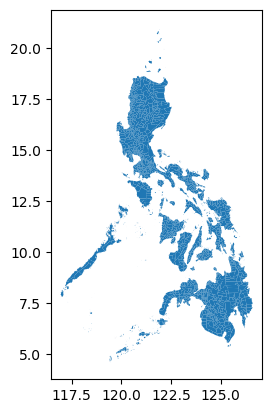

In [5]:
# Using GeoPandas, we can immediately visualize our object using .plot()
ph_shp.plot()

<Axes: >

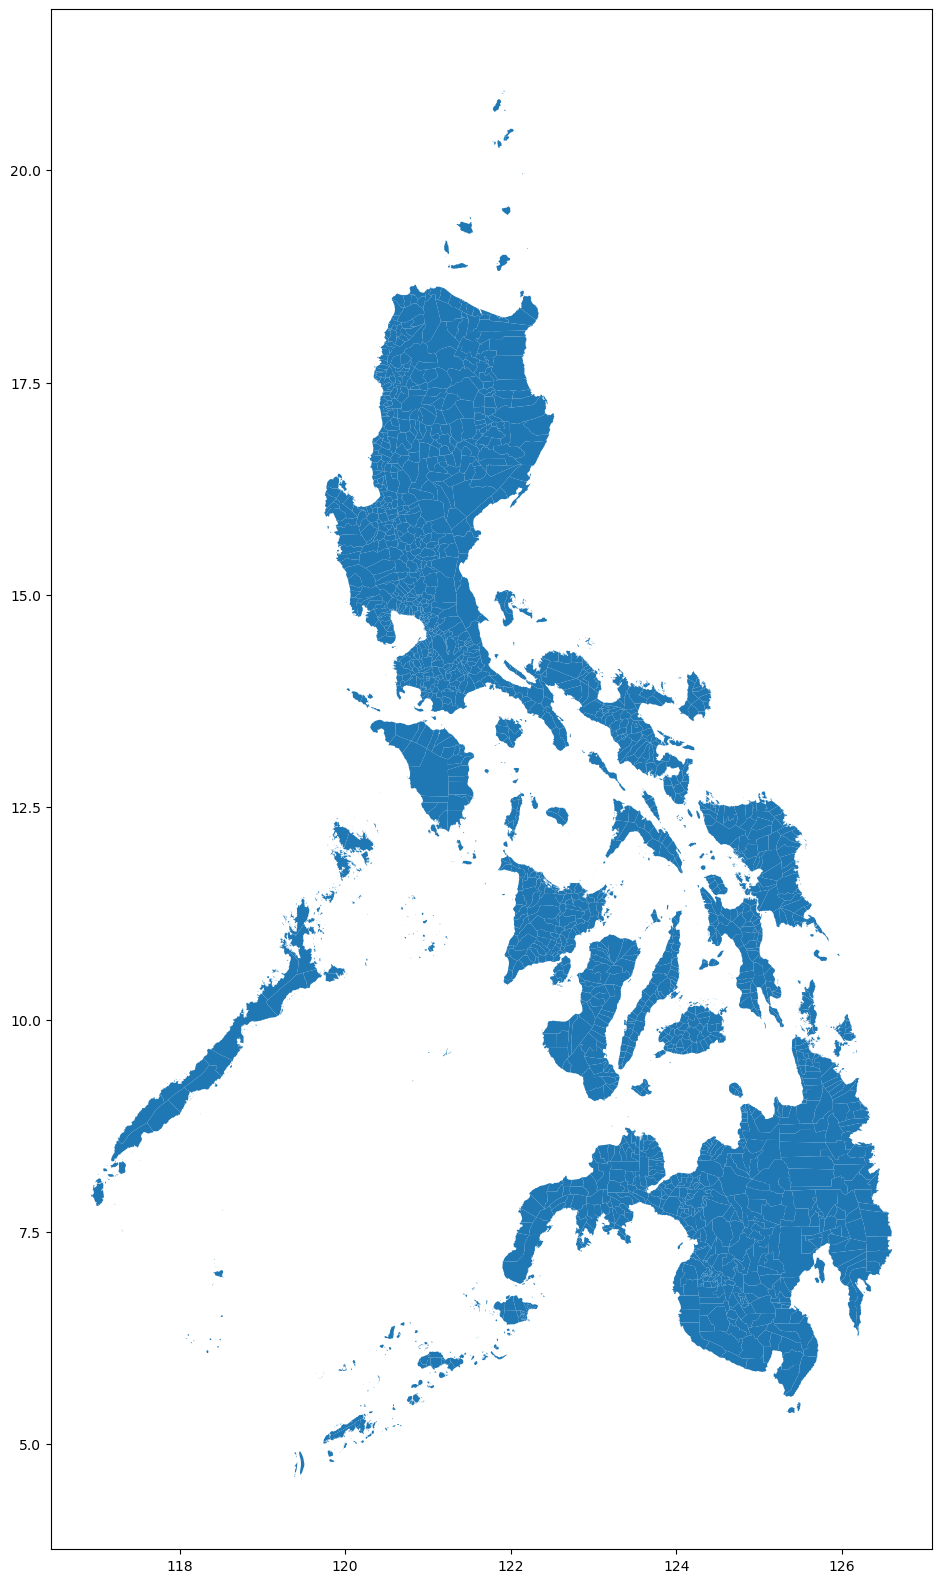

In [6]:
# GeoPandas uses matplotlib to visualize our map so we can use our matplotlib parameters such as figsize
ph_shp.plot(figsize=(20,20))

In [43]:
# Now let's read our osm points as mm_pts. Filter by looking at points insde 'Metropolitan Manila' and amenity != 'None'
mm_pts = gpd.read_postgis('''
SELECT p.*
FROM ph_point as p
JOIN gadm.ph as g ON st_within(p.way,g.geom)
WHERE p.amenity != 'None' AND g.name_1 = 'Metropolitan Manila'
''', con = conn, geom_col = 'way')
mm_pts

/opt/conda/lib/python3.10/site-packages/geopandas/io/sql.py:170: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
0,1323171902,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06504 14.53979)
1,5055079422,None,None,None,None,None,None,None,nightclub,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06733 14.53969)
2,255058348,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06861 14.53961)
3,1323171838,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06228 14.54403)
4,255071432,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06374 14.54548)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14909,4102699590,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (120.99323 14.73031)
14910,4771230923,None,None,Lot 20,None,None,None,None,car_rental,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01211 14.72981)
14911,5601567148,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01246 14.73250)
14912,4607797789,None,None,None,None,None,None,None,shelter,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01159 14.73729)


<Axes: >

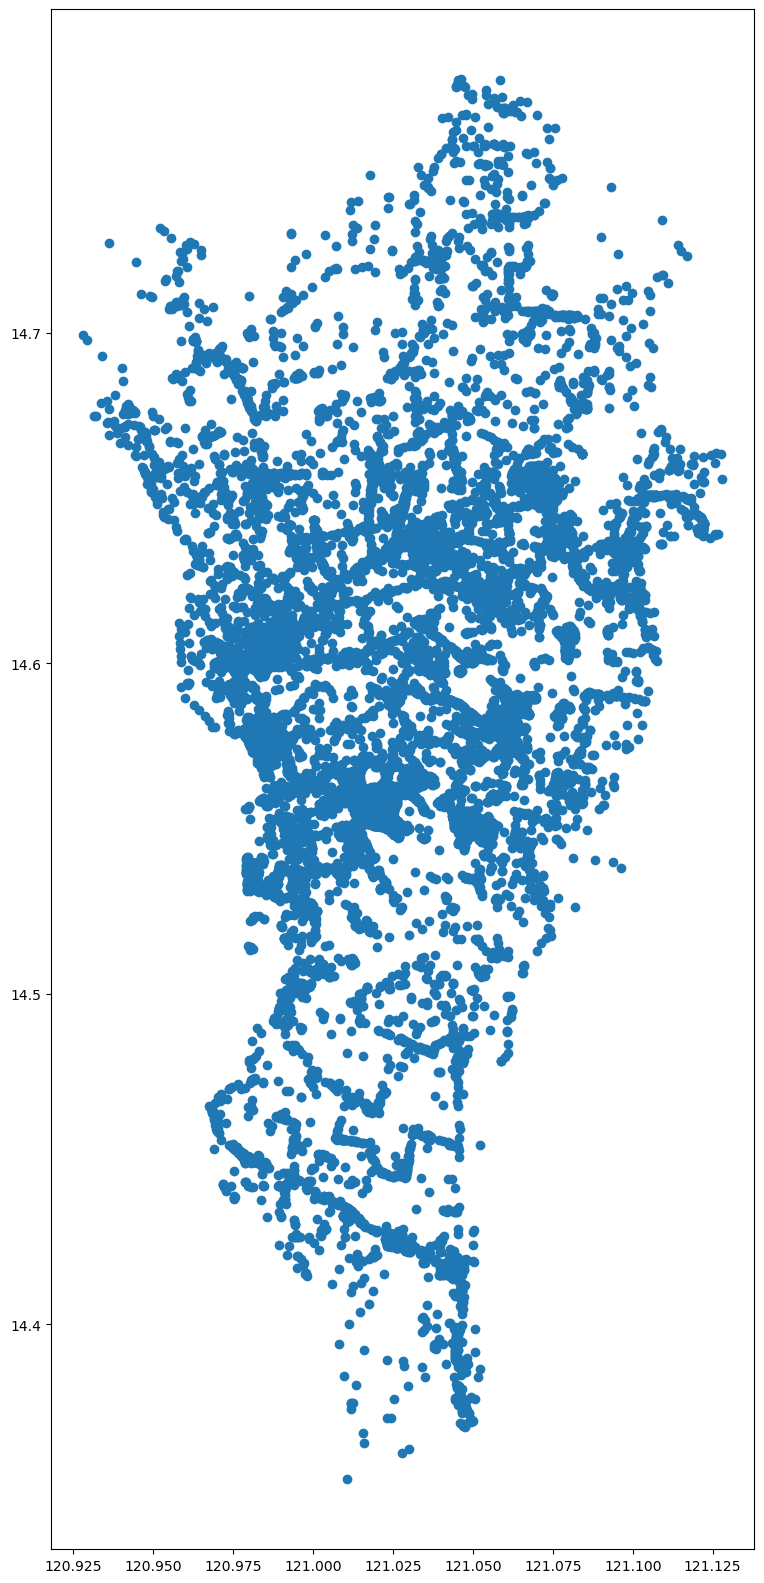

In [8]:
# Now lets visualize our mm_pts
mm_pts.plot(figsize=(20,20))

<Axes: >

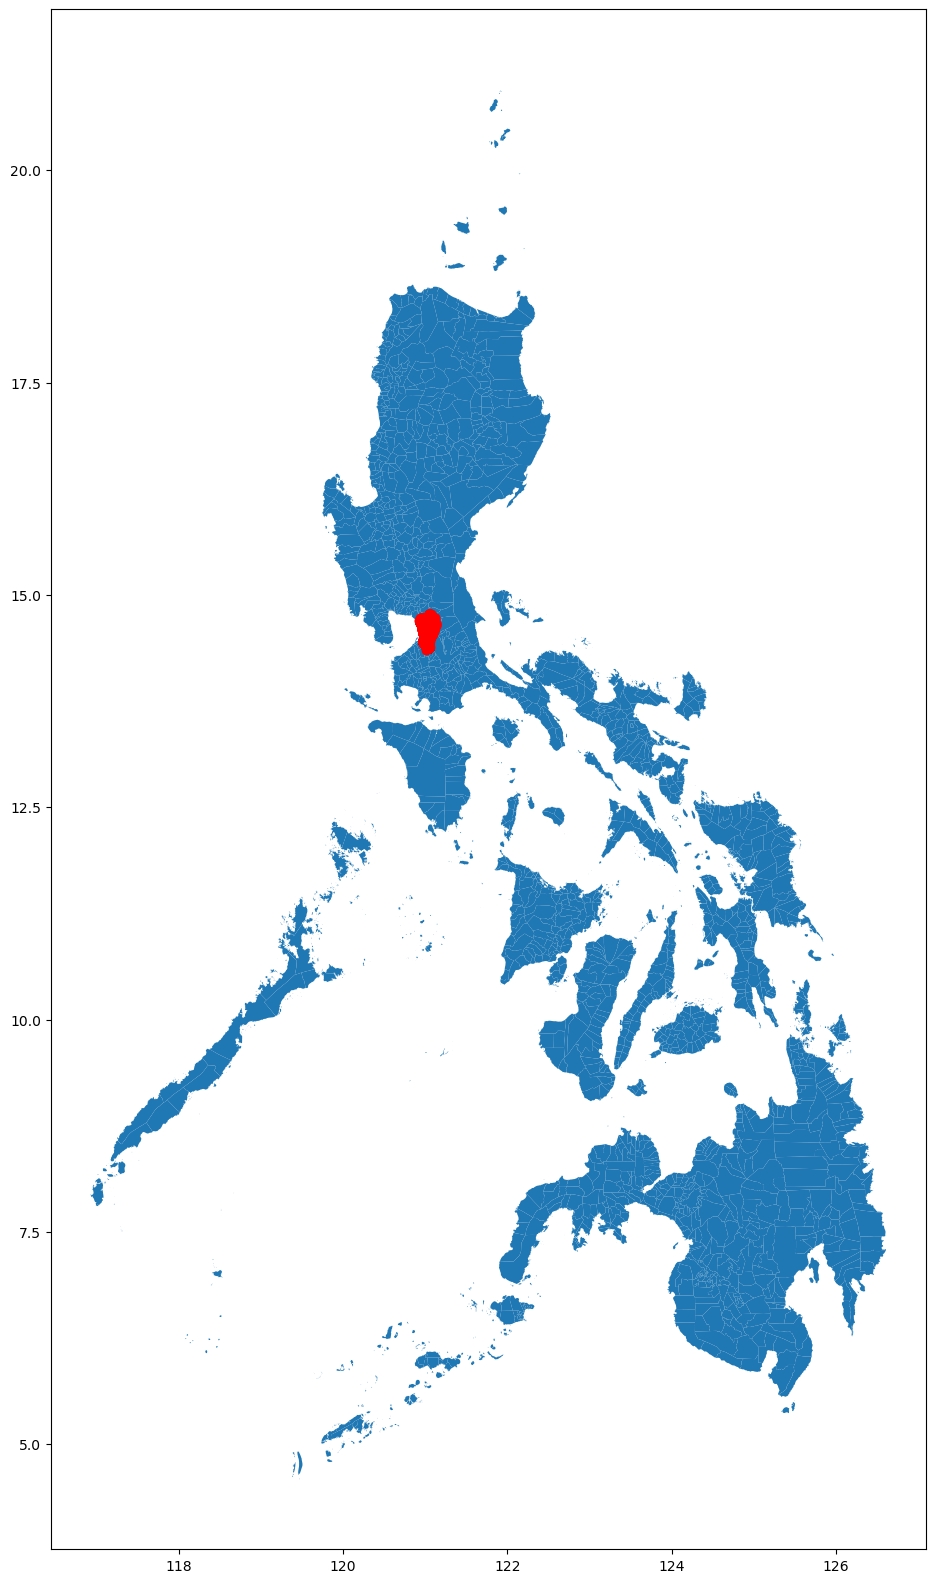

In [9]:
# Plotting our two objects together
ax = ph_shp.plot(figsize=(20,20))
mm_pts.plot(ax=ax,color='red')

<Axes: >

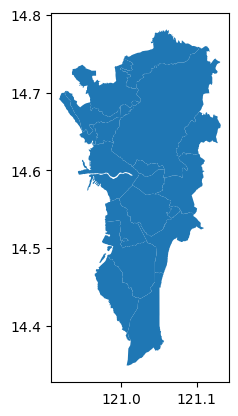

In [10]:
# Notice that we really can't see our points. We can use pandas functions to limit our scope to Metro Manila, mm_shp
mm_shp = ph_shp[ph_shp['name_1']=='Metropolitan Manila']
mm_shp.plot()

<Axes: >

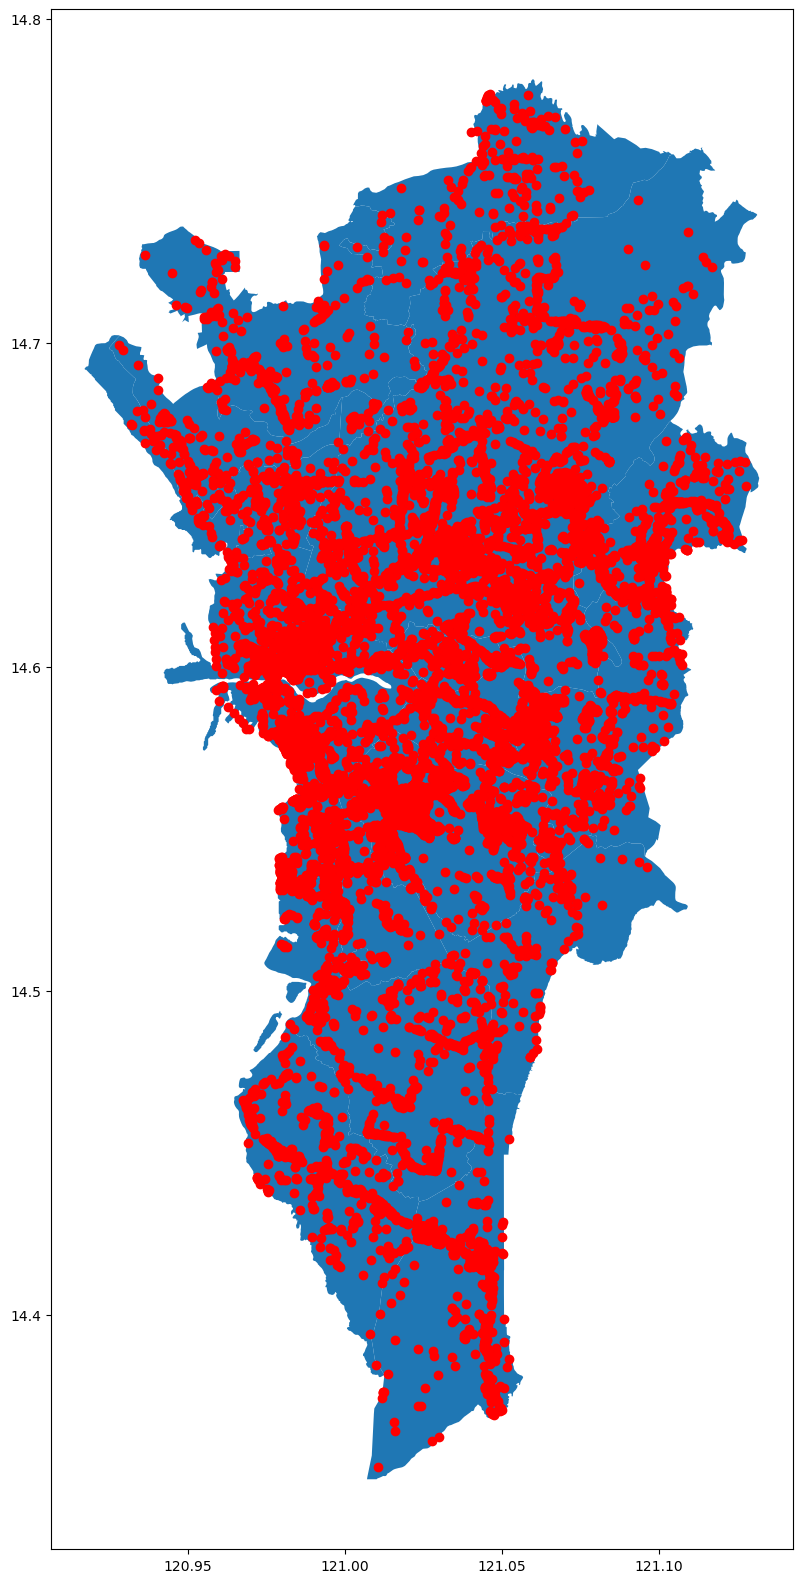

In [11]:
# Plotting our two objects together
ax = mm_shp.plot(figsize=(20,20))
mm_pts.plot(ax=ax,color='red')

<Axes: >

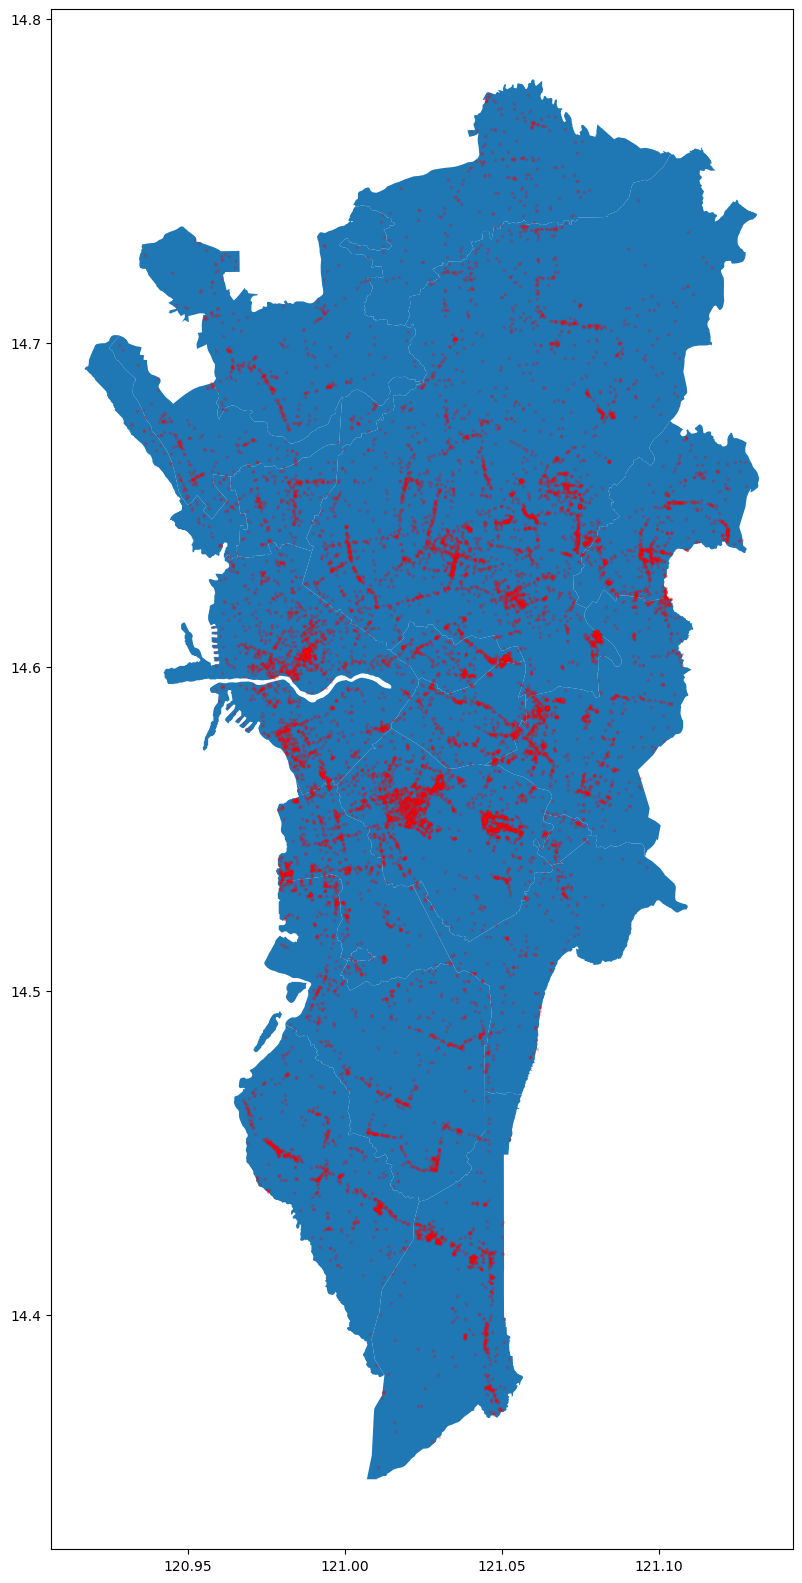

In [12]:
# This result is expected since we're visualizing a lot of points in this area. We can either vary the parameters of our plot:
ax = mm_shp.plot(figsize=(20,20))
mm_pts.plot(ax=ax,color='red',alpha=0.2,markersize=2)

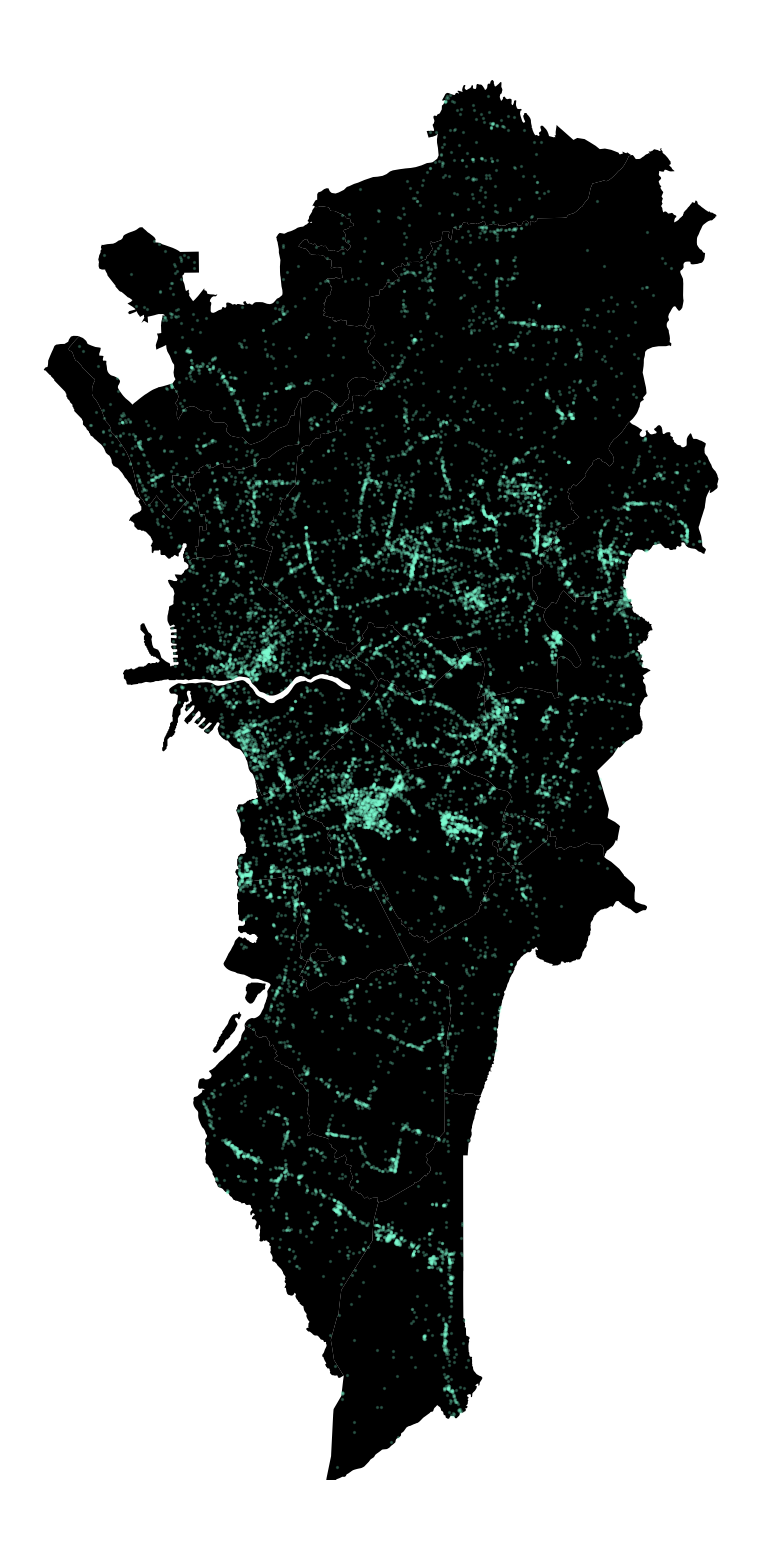

In [13]:
ax = mm_shp.plot(figsize=(20,20),color='black')
mm_pts.plot(ax=ax,color='aquamarine',alpha=0.2,markersize=2)
ax.set_axis_off()

<Axes: >

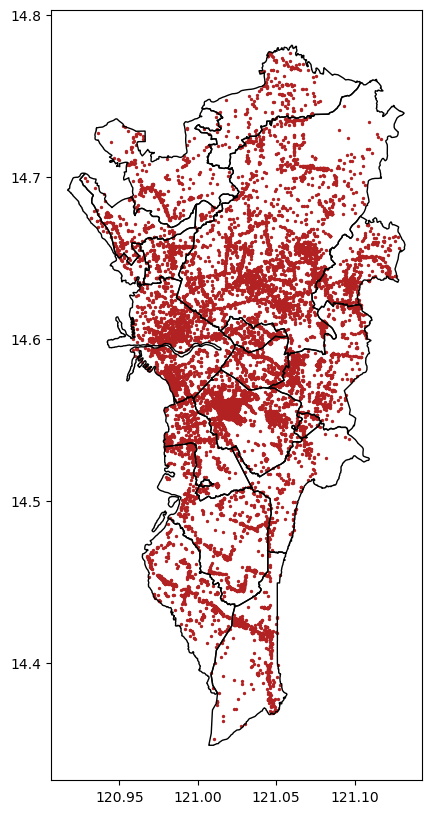

In [14]:
ax = mm_pts.plot(figsize = (10,10),color='firebrick',markersize=2)
mm_shp.plot(ax=ax,facecolor='none',edgecolor='black')

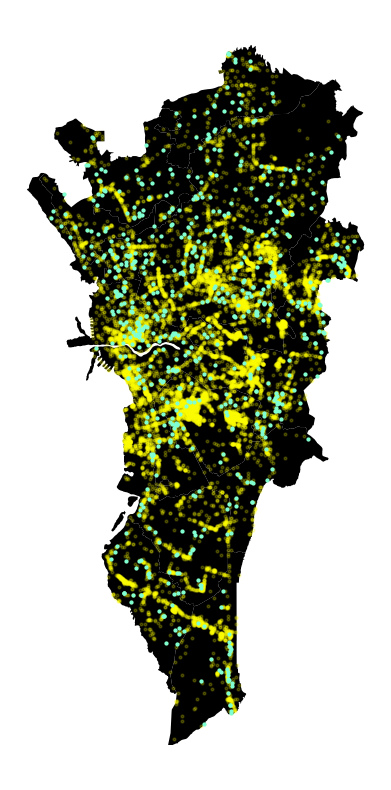

In [15]:
# Or we can just filter our points based on what we are specifically looking for. Let's filter it out by 'school':
school_pts = mm_pts[mm_pts.amenity=='school']
ax = mm_shp.plot(figsize=(10,10), color='black')
mm_pts.plot(ax=ax,color='yellow', alpha=0.2, markersize=4)
school_pts.plot(ax=ax,color='aquamarine', markersize=4)
ax.set_axis_off()

<Axes: >

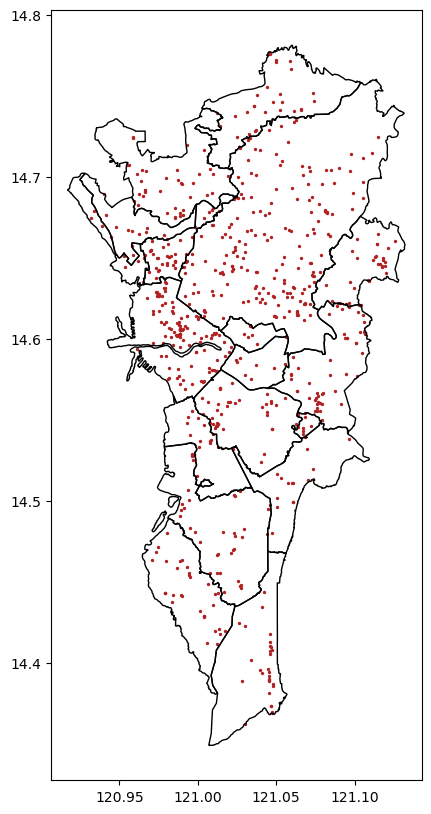

In [16]:
# Showing our school plot:
mm_school = mm_pts[mm_pts['amenity'] == 'school']
mm_school

ax = mm_school.plot(figsize = (10,10),color='firebrick',markersize=2)
mm_shp.plot(ax=ax,facecolor='none',edgecolor='black')

In [17]:
# This result is expected since we're visualizing a lot of points in this area. We can either vary the parameters of our plot:



#### Note that this is where our Mapping Choices would matter. What would be a better way to map this?

### Exercise
Create a map that shows the restaurants within Makati City.

In [23]:
from shapely.wkt import loads
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

/tmp/ipykernel_1736/2575666115.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cities = pd.read_sql(
/tmp/ipykernel_1736/2575666115.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_schools = pd.read_sql('''


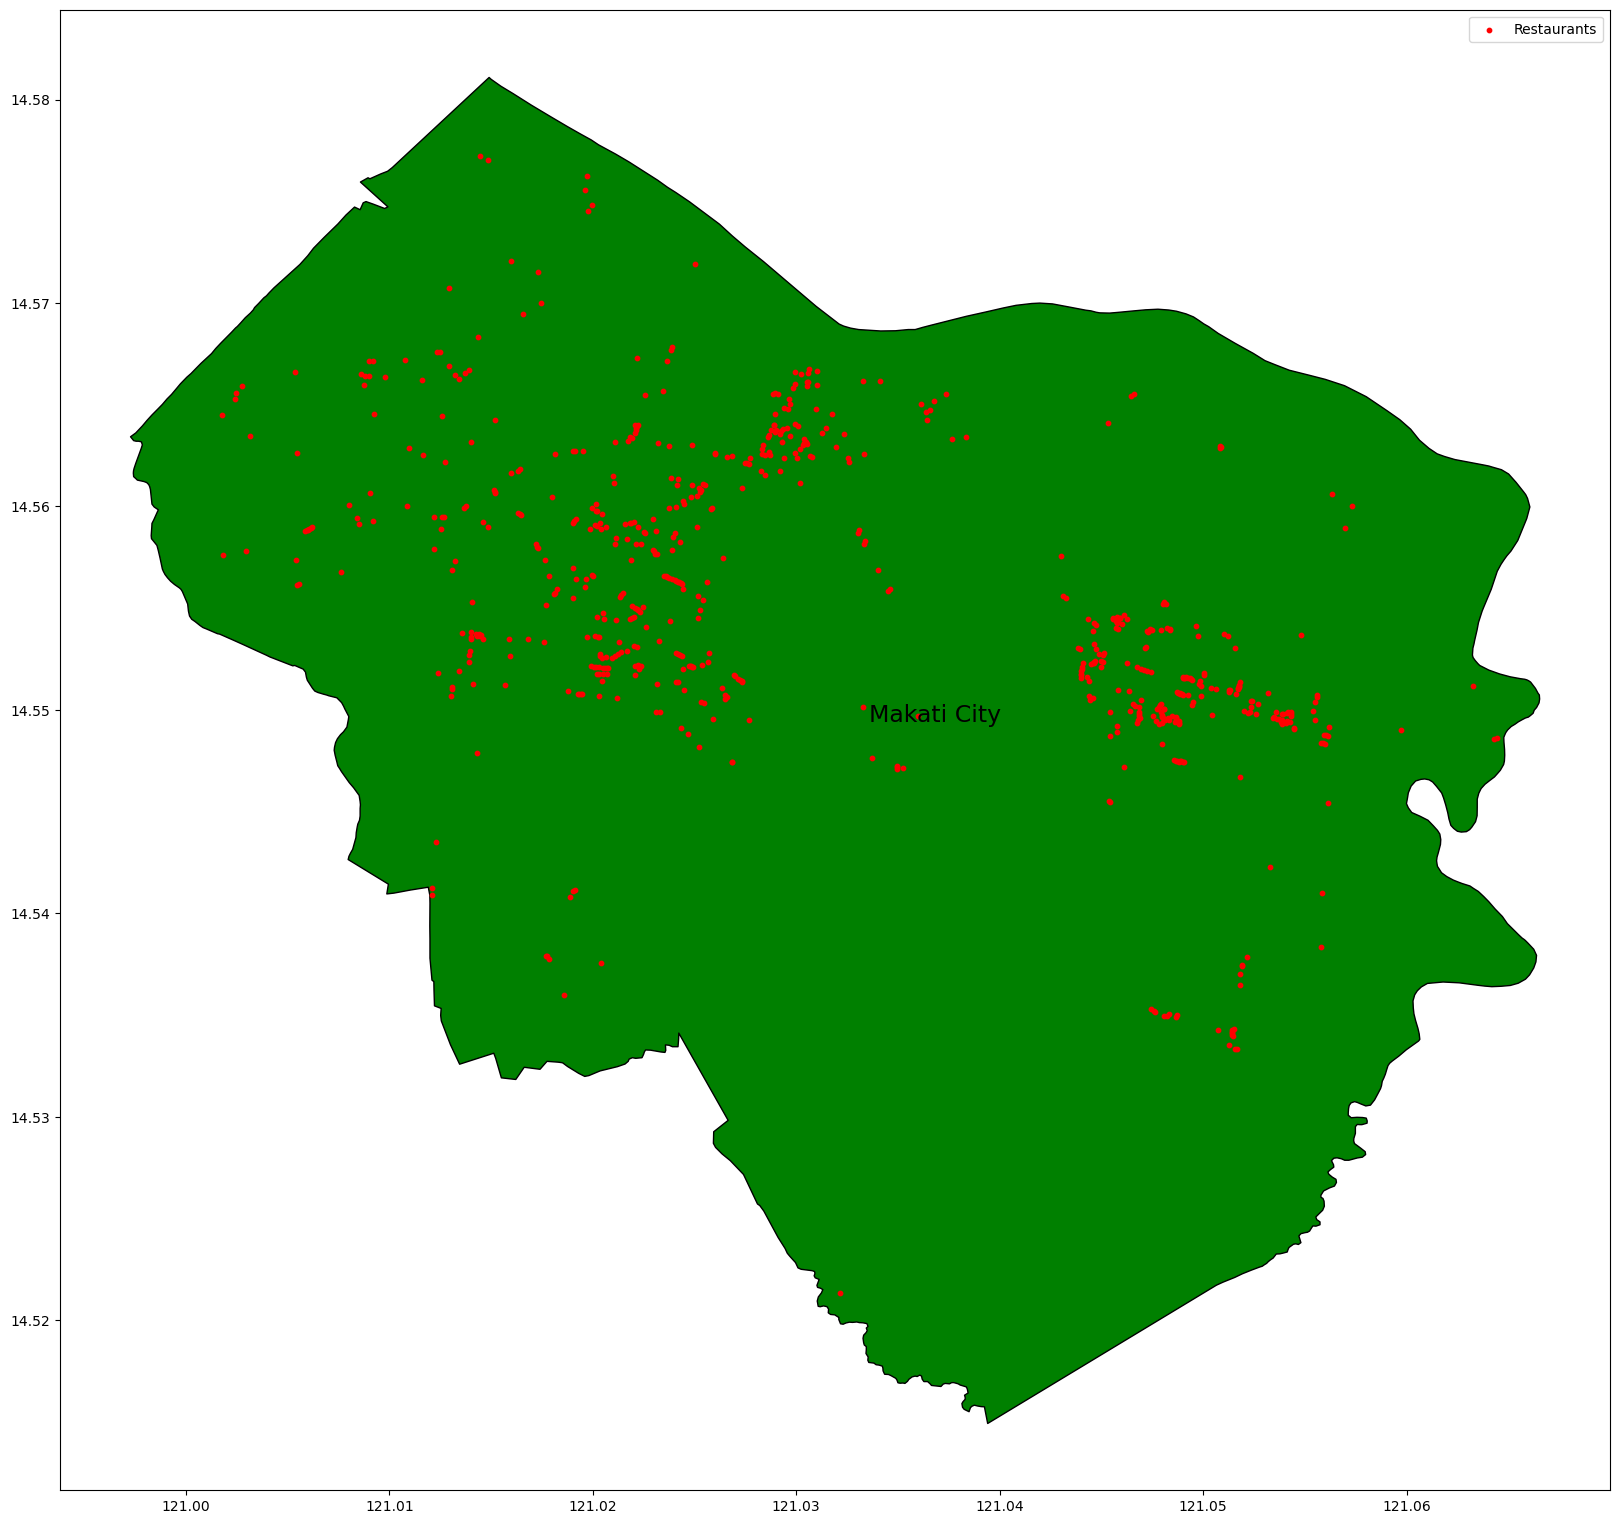

In [24]:
# Your Code Here
fig, ax = plt.subplots (figsize = (20,20))

df_cities = pd.read_sql(
'''
SELECT ST_AsText(geom) as result, name_2 as name 
FROM gadm.ph where name_2 in ('Makati City')
''',conn)

geometries6 = [loads(wkt_string) for wkt_string in df_cities.result]
gdf6 = gpd.GeoDataFrame(geometry=geometries6)
gdf6.plot(ax=ax, color='green', edgecolor='black')

for i, txt in enumerate(df_cities.name):
    ax.annotate(txt, (gdf6.geometry.iloc[i].centroid.x, gdf6.geometry.iloc[i].centroid.y), color='black', fontsize=17)

df_schools = pd.read_sql('''
SELECT ST_AsText(p.way) as result, p.name as name
FROM gadm.ph_brgy g, public.ph_point p
WHERE g.name_2 in ('Makati City') AND st_within(p.way,g.geom)
and amenity in ('restaurant')
''',conn)    
geometries2 = [loads(wkt_string) for wkt_string in df_schools.result]
gdf2 = gpd.GeoDataFrame(geometry=geometries2)    
gdf2.plot(ax=ax, color='red', markersize=10, label='Restaurants')
ax.legend()
plt.show()

<Axes: >

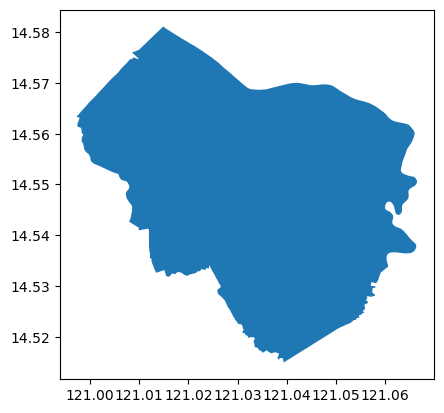

In [21]:
makati_shp = ph_shp[ph_shp['name_2']=='Makati City']
makati_shp.plot()

In [25]:
makati_rest = mm_pts[mm_pts['amenity'] == 'restaurant']
makati_rest

,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
10,5055079423,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06719 14.54281)
19,1435066498,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06617 14.54531)
26,5574831624,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06697 14.54478)
33,4927836924,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06811 14.54563)
34,4927836524,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06819 14.54561)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14853,2996185513,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.02190 14.69425)
14858,4621550390,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (120.99004 14.70633)
14893,2738900701,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (120.95946 14.72231)
14896,5282604751,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (120.95361 14.73069)


<Axes: >

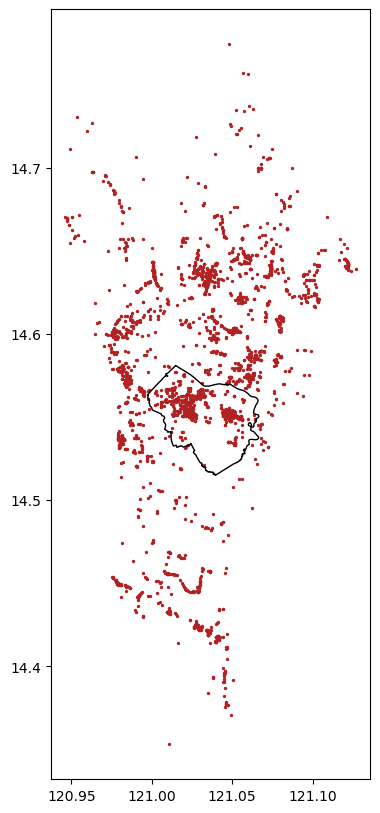

In [26]:
ax = makati_rest.plot(figsize = (10,10),color='firebrick',markersize=2)
makati_shp.plot(ax=ax,facecolor='none',edgecolor='black')

In [27]:
makati_shp = gpd.read_postgis(
'''
SELECT *
FROM gadm.ph_brgy
WHERE name_2 = 'Makati City'
'''
,con = conn, geom_col ='geom'
)
makati_shp

/opt/conda/lib/python3.10/site-packages/geopandas/io/sql.py:170: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,nl_name_2,gid_3,name_3,varname_3,nl_name_3,type_3,engtype_3,cc_3,hasc_3,geom
0,24564,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.1_1,Bangkal,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.01852 14.54415, 121.01809 ..."
1,24565,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.2_1,Bel-Air,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.03558 14.55826, 121.03478 ..."
2,24566,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.3_1,Carmona,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.01378 14.57440, 121.01385 ..."
3,24567,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.4_1,Cembo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.04842 14.56279, 121.04831 ..."
4,24568,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.5_1,Comembo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.06582 14.54963, 121.06567 ..."
5,24569,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.6_1,Dasmariñas,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.02420 14.53414, 121.02270 ..."
6,24570,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.7_1,East Rembo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.05642 14.54991, 121.05632 ..."
7,24571,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.8_1,Forbes Park,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.03905 14.55736, 121.03905 ..."
8,24572,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.9_1,Guadalupe Nuevo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.04181 14.56047, 121.04021 ..."
9,24573,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.10_1,Guadalupe Viejo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.03281 14.56430, 121.03275 ..."


In [28]:
makati_rest = gpd.read_postgis('''
SELECT p.*
FROM ph_point p
JOIN gadm.ph g ON st_within(p.way,g.geom)
WHERE p.amenity = 'restaurant' AND g.name_2 = 'Makati City'
''', conn, geom_col = 'way')
makati_rest

/opt/conda/lib/python3.10/site-packages/geopandas/io/sql.py:170: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
0,4730680638,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01209 14.54092)
1,4730680822,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01209 14.54124)
2,5441764222,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01229 14.54350)
3,244466926,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01858 14.53598)
4,1346621384,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01783 14.53778)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,1437660247,None,Philplans Corporate Center,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05635 14.56063)
674,1400573068,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05731 14.56005)
675,4528435891,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05080 14.56289)
676,4528435893,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05085 14.56292)


<Axes: >

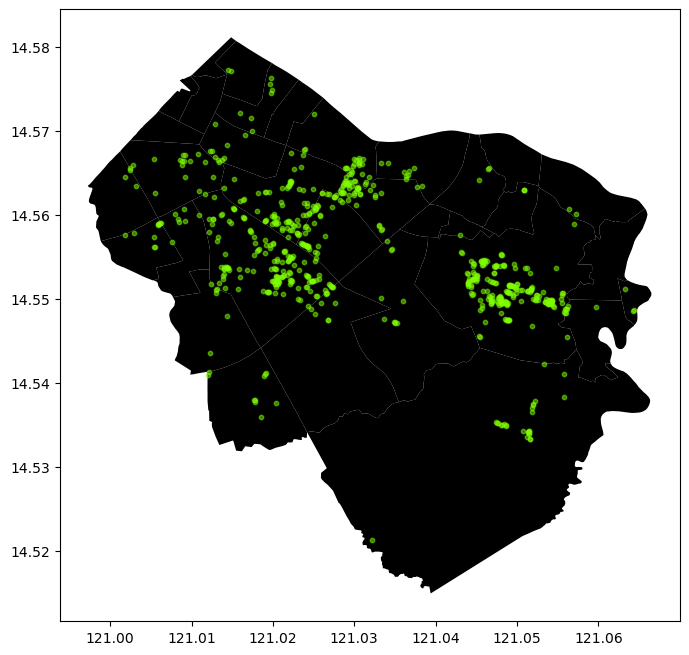

In [29]:
ax = makati_shp.plot(figsize = (8,8), color = 'black')
makati_rest.plot(ax = ax, color = 'chartreuse', markersize = 10, alpha = 0.5)

### Merging Data

In [44]:
# Let's read our financial and population data from our last meeting 
fin_pop = pd.read_csv('financial_pop.csv')
fin_pop

,pop,tot_local_sources,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,48163.0,74.045920,36.556294,230.577076,206.848717,23.728359,0.0,16.202464,21.181116,15.758681,Abra,Bangued
1,3573.0,0.115667,0.035633,56.689883,54.409910,2.279973,0.0,0.000000,0.030000,20.369743,Abra,Boliney
2,17115.0,1.736411,1.019565,93.647242,66.222389,27.424853,0.0,19.560034,20.792182,6.632671,Abra,Bucay
3,2501.0,0.273689,0.129150,44.789104,29.633181,15.155923,0.0,0.479569,0.656569,24.348356,Abra,Bucloc
4,2088.0,0.643801,0.277660,51.242322,47.848486,3.393836,0.0,0.000000,0.000000,6.511575,Abra,Daguioman
...,...,...,...,...,...,...,...,...,...,...,...,...
1622,NaN,15.448920,5.801291,165.833472,116.742464,49.091008,0.0,30.375550,40.505854,29.068270,Camarines Sur,Tinambac
1623,NaN,3.881869,2.064453,59.176489,50.055428,9.121061,0.0,0.000000,0.000000,33.135557,Camarines Sur,Camaligan
1624,NaN,4.867135,2.615213,144.692431,100.076373,44.616059,0.0,0.502352,0.502352,106.534443,Camarines Sur,Lagonoy
1625,NaN,5.261260,1.360630,95.936120,61.682604,34.253516,0.0,13.592182,13.949405,40.976700,Camarines Sur,Balatan


In [45]:
# now let's merge it to our mm_shp
mm_data = mm_shp.merge(fin_pop, left_on = ['name_1', 'name_2'],
                       right_on = ['shp_province', 'shp_municipality'])
mm_data

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,...,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,973,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.13_1,Pateros,None,None,...,56.080847,201.599229,163.300161,38.299068,0.000000,1.482140,4.546140,62.811989,Metropolitan Manila,Pateros
1,974,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.14_1,Quezon City,None,None,...,12833.213830,18526.608000,9782.849320,8743.758684,0.000000,4860.912186,4860.912186,12761.512750,Metropolitan Manila,Quezon City
2,965,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.5_1,Mandaluyong,"Mandaluyong, City of",None,...,4851.641755,5862.396531,2960.364965,2902.031566,5.599664,102.726892,267.430004,3491.561763,Metropolitan Manila,Mandaluyong
3,966,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.6_1,Manila,"City of Manila|Manila, City of",None,...,8009.830859,11975.244480,7523.296121,4451.948361,266.429514,2287.001749,2347.412734,5701.646022,Metropolitan Manila,Manila
4,967,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.7_1,Marikina,"Marikina, City of",None,...,1008.797613,2366.331933,1606.966038,759.365894,338.653456,336.088870,422.780337,1347.965746,Metropolitan Manila,Marikina
5,968,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.8_1,Muntinlupa,"Muntinlupa, City of",None,...,2546.918961,4315.507771,2990.154537,1325.353234,0.000000,957.577746,1089.389596,995.435257,Metropolitan Manila,Muntinlupa
6,961,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,None,...,2078.233727,4718.102455,2885.275622,1832.826833,372.406907,307.132984,548.347680,671.177751,Metropolitan Manila,Kalookan City
7,962,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.2_1,Las Piñas,"Las Piñas, City of",None,...,948.154753,2107.391432,1743.842711,363.548721,535.127365,126.072295,453.219048,1524.694001,Metropolitan Manila,Las Piñas
8,963,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,"Makati, City of",None,...,11338.122110,13575.480700,7444.964790,6130.515909,0.000000,71.159205,479.640478,11126.810600,Metropolitan Manila,Makati City
9,964,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.4_1,Malabon,None,None,...,406.027365,1254.476844,945.121196,309.355647,0.000000,189.269629,265.790960,465.910035,Metropolitan Manila,Malabon


<Axes: >

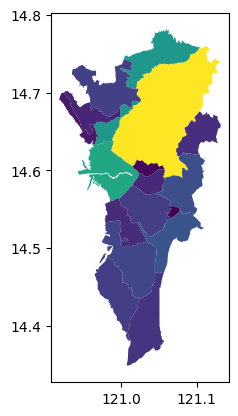

In [32]:
# Now we can use this table to create a choropleth map using population
mm_data.plot(column = 'pop')

Text(252.3977261112537, 0.5, 'Latitude')

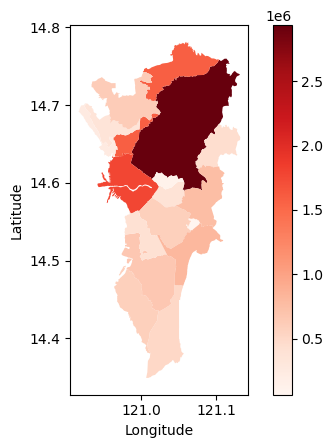

In [33]:
mm_data.plot(column = 'pop', cmap='Reds',
            legend=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Text(252.3977261112537, 0.5, 'Latitude')

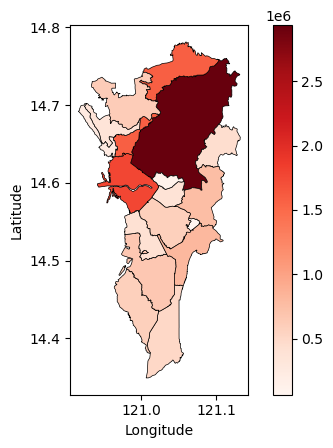

In [34]:
mm_data.plot(column = 'pop', cmap='Reds',
            legend=True,
            edgecolor='black',
            linewidth = 0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [ ]:
# Again, using matplotlib parameters, we can fix the map to make it more appealing:


### Exercise : Create maps for:

1) Visualizing the population density of each province.

2) Identifying the Cities/Municipalites within 14 km from Makati City.

In [46]:
ph_area_df = pd.read_sql('''
SELECT
    g.name_1 as province_name,  
    g.name_2 as municipality_name,
    ST_Area(ST_Transform(g.geom, 3123)) / 1000000 AS area_km2
FROM gadm.ph g;
''', conn)
ph_area_df

/tmp/ipykernel_1736/1872269558.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ph_area_df = pd.read_sql('''


,province_name,municipality_name,area_km2
0,Abra,Bangued,123.642791
1,Abra,Boliney,182.628599
2,Abra,Bucay,104.379392
3,Abra,Bucloc,51.267307
4,Abra,Daguioman,97.269071
...,...,...,...
1642,Zamboanga Sibugay,Naga,164.436182
1643,Zamboanga Sibugay,Talusan,50.702844
1644,Zamboanga Sibugay,Olutanga,68.838453
1645,Zamboanga Sibugay,Payao,195.523696


In [47]:
ph_data = ph_shp.merge(fin_pop, left_on = ['name_1', 'name_2'],
                       right_on = ['shp_province', 'shp_municipality'])
ph_data

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,...,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,36.556294,230.577076,206.848717,23.728359,0.000000,16.202464,21.181116,15.758681,Abra,Bangued
1,2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,...,0.035633,56.689883,54.409910,2.279973,0.000000,0.000000,0.030000,20.369743,Abra,Boliney
2,3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,...,1.019565,93.647242,66.222389,27.424853,0.000000,19.560034,20.792182,6.632671,Abra,Bucay
3,4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,...,0.129150,44.789104,29.633181,15.155923,0.000000,0.479569,0.656569,24.348356,Abra,Bucloc
4,5,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,...,0.277660,51.242322,47.848486,3.393836,0.000000,0.000000,0.000000,6.511575,Abra,Daguioman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,1640,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.9_1,Naga,None,None,...,1.971273,111.794689,95.422396,16.372293,13.599554,11.833956,25.795376,19.672140,Zamboanga Sibugay,Naga
1612,1645,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.14_1,Talusan,None,None,...,0.395521,67.680146,48.301937,19.378210,0.111334,2.467549,5.778088,33.402940,Zamboanga Sibugay,Talusan
1613,1641,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.10_1,Olutanga,None,None,...,0.820690,93.391956,71.556504,21.835452,0.207762,0.404558,3.617629,23.531812,Zamboanga Sibugay,Olutanga
1614,1642,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.11_1,Payao,None,None,...,1.209460,97.101100,86.835505,10.265594,15.699376,0.000000,1.281661,32.806249,Zamboanga Sibugay,Payao


In [49]:
ph_data_with_area = ph_data.merge(ph_area_df, left_on=['name_1', 'name_2'], right_on=['province_name', 'municipality_name'])
ph_data_with_area

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,...,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality,province_name,municipality_name,area_km2
0,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,23.728359,0.000000,16.202464,21.181116,15.758681,Abra,Bangued,Abra,Bangued,123.642791
1,2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,...,2.279973,0.000000,0.000000,0.030000,20.369743,Abra,Boliney,Abra,Boliney,182.628599
2,3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,...,27.424853,0.000000,19.560034,20.792182,6.632671,Abra,Bucay,Abra,Bucay,104.379392
3,4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,...,15.155923,0.000000,0.479569,0.656569,24.348356,Abra,Bucloc,Abra,Bucloc,51.267307
4,5,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,...,3.393836,0.000000,0.000000,0.000000,6.511575,Abra,Daguioman,Abra,Daguioman,97.269071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,1640,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.9_1,Naga,None,None,...,16.372293,13.599554,11.833956,25.795376,19.672140,Zamboanga Sibugay,Naga,Zamboanga Sibugay,Naga,164.436182
1612,1645,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.14_1,Talusan,None,None,...,19.378210,0.111334,2.467549,5.778088,33.402940,Zamboanga Sibugay,Talusan,Zamboanga Sibugay,Talusan,50.702844
1613,1641,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.10_1,Olutanga,None,None,...,21.835452,0.207762,0.404558,3.617629,23.531812,Zamboanga Sibugay,Olutanga,Zamboanga Sibugay,Olutanga,68.838453
1614,1642,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.11_1,Payao,None,None,...,10.265594,15.699376,0.000000,1.281661,32.806249,Zamboanga Sibugay,Payao,Zamboanga Sibugay,Payao,195.523696


Text(218.95250301918804, 0.5, 'Latitude')

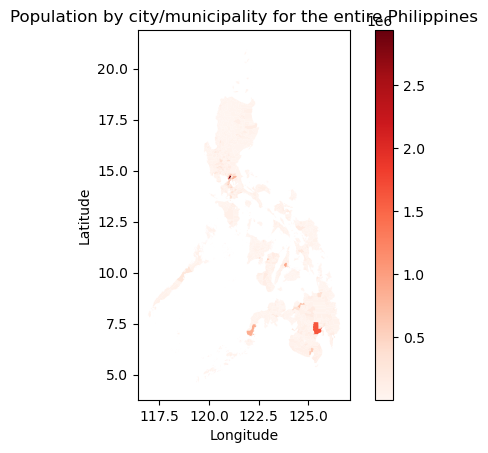

In [51]:
ph_data_with_area['pop_density'] = ph_data_with_area['pop'] / ph_data_with_area['area_km2']

ph_data_with_area.plot(column = 'pop', cmap='Reds', legend=True)
plt.title("Population by city/municipality for the entire Philippines")
plt.xlabel("Longitude")
plt.ylabel("Latitude")


/tmp/ipykernel_1736/2785480191.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mm_data['geom'].area
/tmp/ipykernel_1736/2785480191.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mm_data['pop_dens'] = mm_data['pop']/mm_data['geom'].area


Text(252.3977261112537, 0.5, 'Latitude')

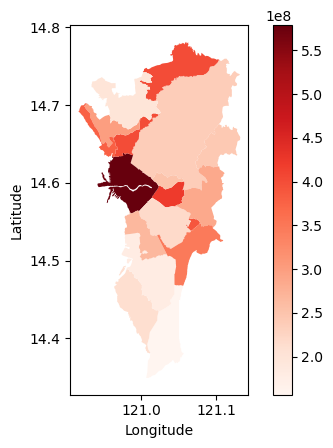

In [52]:
mm_data['geom'].area
mm_data['pop_dens'] = mm_data['pop']/mm_data['geom'].area

mm_data.plot(column = 'pop_dens', cmap='Reds',
            legend=True,
            #edgecolor='black',
            linewidth = 0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")


<Axes: >

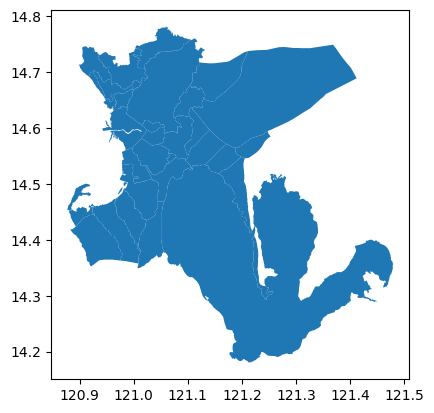

In [61]:
makati_close = gpd.read_postgis(
    """
    SELECT gadm2.name_1, gadm2.name_2, gadm2.geom
    FROM gadm.ph as gadm2
    JOIN
        (SELECT *
        FROM gadm.ph
        WHERE name_1 = 'Metropolitan Manila'
        AND name_2 = 'Makati City') as gadm
    ON
        ST_DWithin(ST_Transform(gadm2.geom, 3123), ST_Transform(gadm.geom, 3123), 14000)
    """,
    conn,
    geom_col='geom'
)
makati_close
makati_close.plot()

<Axes: >

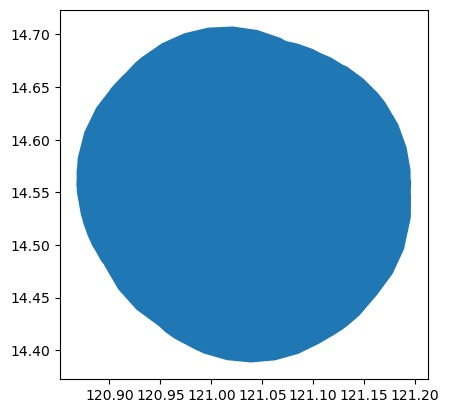

In [69]:
makati_circle = gpd.read_postgis(
"""
SELECT g1.name_2, st_transform(st_buffer(st_transform(g1.geom,3123),14000),4326) as geom
FROM gadm.ph as g1
WHERE g1.name_2 = 'Makati City'
""", conn)
makati_circle.plot()

(14.150595664499999, 14.811345105500001)

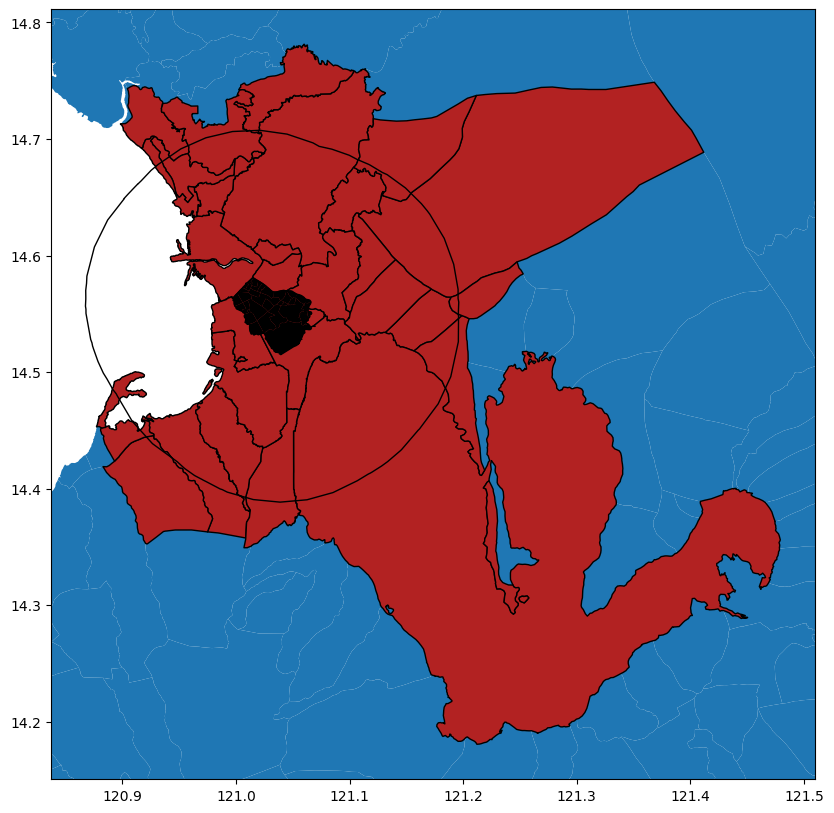

In [70]:
ax = makati_close.plot(figsize = (10,10), color='firebrick', edgecolor='black', zorder=5)
makati_circle.plot(ax=ax, facecolor='none', edgecolor='black', zorder=10)
makati_shp.plot(ax=ax, color='black', zorder=15)
xlims =plt.xlim()
ylims =plt.ylim()
ph_shp.plot(ax=ax, zorder=0)

plt.xlim(xlims)
plt.ylim(ylims)